# Network (Hydrogen)

This notebook shows summary of hydrogen backbone to be built by 2030 proposed by Project Union, Industrial Clusters and Salt Caverns as potential sites for hydrogen storage. 

The network model has total 16 buses (10 buses: Industrial Clusters; 3 buses: Salt Caverns; 3 buses: assumed Battery Limit B/L points) and 15 links connecting the buses. Currently Industrial Cluster Barrow is excluded from the modelling, as no sufficient data is publically available for production and consumption at this site. 

## GIS Areas

There are two approaches for geo special division used in FES 2023: DNO Lincense Areas and NUTS Level 1. At current stage DNO License Areas were only printed for spacial resolution.

### Plot Clusters and Lines on DNO Lincense Areas

In [1]:
import geopandas as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read and convert Shapefile to Lon|Lat coordinates:

s = gp.read_file('../data/network/GIS/01 ESO - DNO License Areas/DNO_License_Areas_20200506.shx')

s = s.set_index('LongName', inplace=False)

colors = {'UKPN (East)': 'lightpink',  
            'WPD (East Midlands)': 'mediumpurple',     
            'UKPN (London)': 'violet',  
            'SPEN (SP MANWEB)': 'lightsteelblue',     
            'WPD (Midlands)': 'plum',     
            'NPG (Northern Electric)': 'paleturquoise',     
            'ENWL': 'lemonchiffon',     
            'SSE': 'lightcoral',    
            'UKPN (South)': 'palegreen',     
            'WPD (South Wales)': 'khaki',   
            'WPD (South West)': 'skyblue',     
            'NPG (Yorkshire Electric)': 'lightsalmon',     
            'SPEN (SP Distribution)': 'peachpuff',     
            'SSE (Southern)': 'lightgreen'}


s['geometry']=s['geometry'].to_crs(epsg=4326)

In [3]:
# Extract bus coordinates for plotting:

df_buses = pd.read_csv('../data/network/buses.csv', index_col=0)

df1 = gp.GeoDataFrame(df_buses, crs='epsg:4326', geometry = gp.points_from_xy(df_buses['x'],df_buses['y'])) #where df is your df with the scatter data

In [4]:
# Extract line coordinates for plotting

df_lines = pd.read_csv('../data/network/links.csv', index_col=0)

line_coordinates = []
for i in range(len(df_lines['bus0'].values)):

    bus0 = df_lines['bus0'].iloc[i]
    bus1 = df_lines['bus1'].iloc[i]
    bus0_coord = [df_buses['x'][bus0], df_buses['y'][bus0]]
    bus1_coord = [df_buses['x'][bus1], df_buses['y'][bus1]]
    line_coordinates.append([bus0_coord, bus1_coord])

In [5]:
# Extract cluster names

df_network = pd.read_csv('../data/network/buses.csv')

lon1 = df_network['x'].values
lat1 = df_network['y'].values
coordinates = np.zeros(shape=(len(lon1), 2))
for i in range(len(lon1)):
    coordinates[i][0] = lon1[i]
    coordinates[i][1] = lat1[i]

df_network1 = df_network.loc[7:12]  
lon2 = df_network1['x'].values
lat2 = df_network1['y'].values
coordinates = np.zeros(shape=(len(lon2), 2))
for i in range(len(lon2)):
    coordinates[i][0] = lon2[i]
    coordinates[i][1] = lat2[i]
    
df_network2 = df_network.loc[12:13]  
lon3 = df_network2['x'].values
lat3 = df_network2['y'].values
coordinates = np.zeros(shape=(len(lon3), 2))
for i in range(len(lon3)):
    coordinates[i][0] = lon3[i]
    coordinates[i][1] = lat3[i]

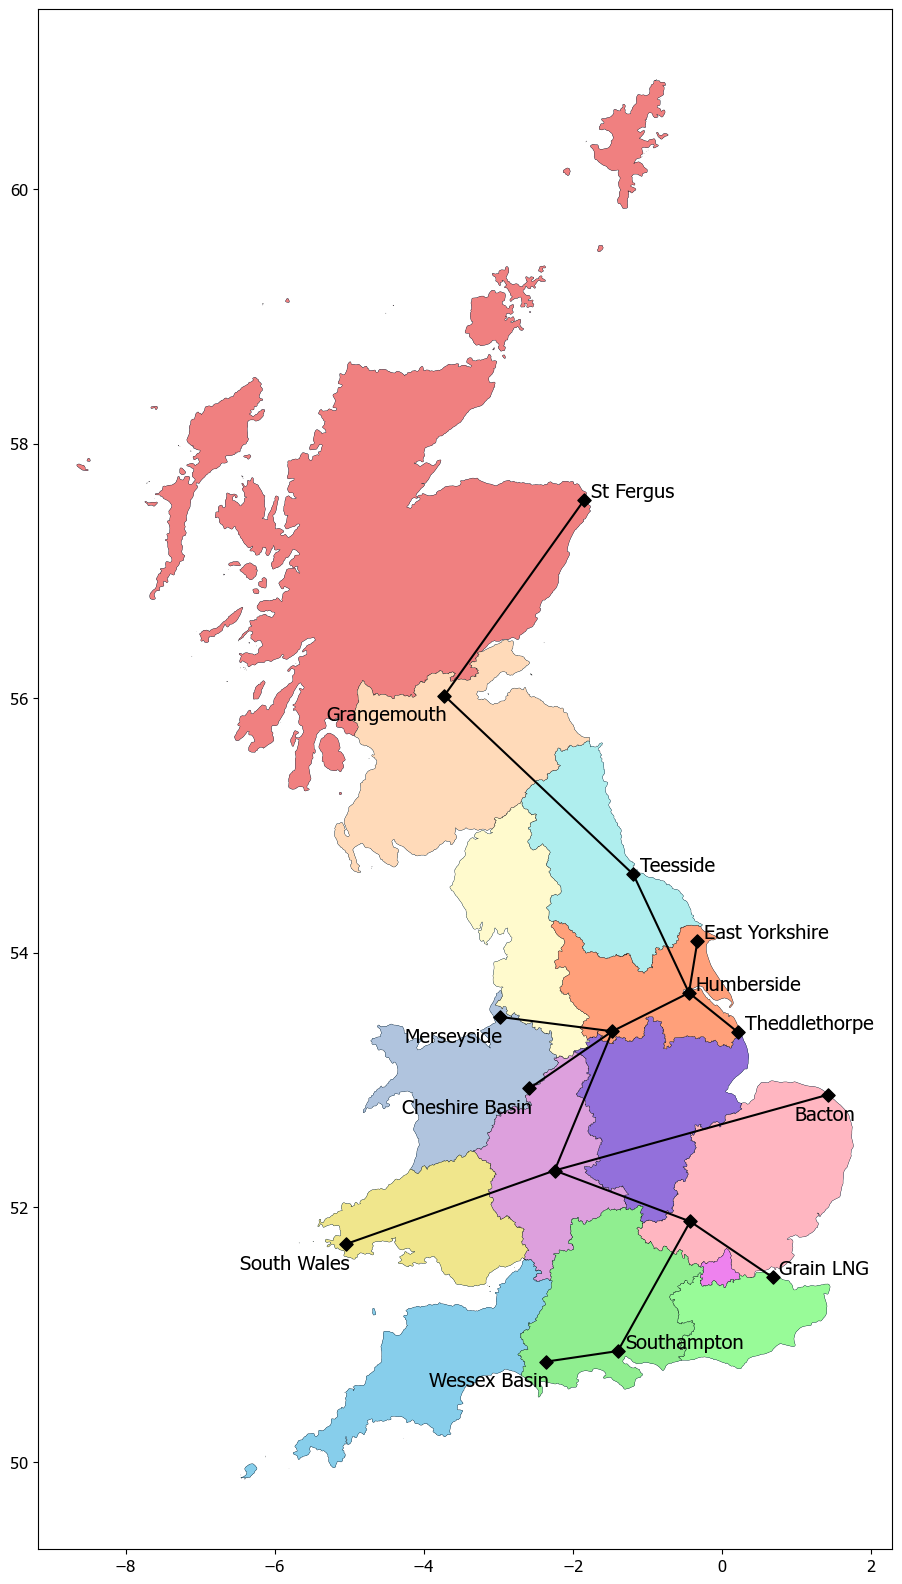

In [6]:
# Plot data:

plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Tahoma"]

ax = s.plot(figsize = (20,20))

s = s.plot(ax=ax, color=[colors[col] for col in s.index], edgecolor='black', linewidth=0.2, legend = True)

df1.plot(ax=ax,color='black',markersize=45,marker='D')

for i, txt in enumerate(df_buses[:7].index):
    ax.annotate(txt, (lon1[i], lat1[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='left',
                color='black',
                fontsize='large')
    
for i, txt in enumerate(df_buses[7:12].index):
    ax.annotate(txt, (lon2[i], lat2[i]),
                xytext=(2, -18),
                textcoords='offset points',
                ha='right',
                color='black',
                fontsize='large')

for i, txt in enumerate(df_buses[12:13].index):
    ax.annotate(txt, (lon3[i], lat3[i]),
                xytext=(20, -18),
                textcoords='offset points',
                ha='right',
                color='black',
                fontsize='large')
    
for i in range(len(df_lines['bus0'].values)):
    ax.plot([line_coordinates[i][0][0], line_coordinates[i][1][0]],
            [line_coordinates[i][0][1], line_coordinates[i][1][1]],
            c= 'black',
            linewidth=1.5)